# Description of Pima Diabetes dataset 
Data Set Information: 
    Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. ADAP is an adaptive learning routine that generates and executes digital analogy of perceptron-like devices. It is a unique algorithm; see the paper for details. 
    
Attribute Information: 
      Number of times pregnant 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 3. Diastolic blood pressure (mm Hg) 4. Triceps skin fold thickness (mm) 5. 2-Hour serum insulin (mu U/ml) 6. Body mass index (weight in kg/(height in m)^2) 7. Diabetes pedigree function 8. Age (years) 9. Class variable (0 or 1) ** 
 
 
UPDATE:
    Until 02/28/2011 this web page indicated that there were no missing values in the dataset. As pointed out by a repository user, this cannot be true: there are zeros in places where they are biologically impossible, such as the blood pressure attribute. It seems very likely that zero values encode missing data. However, since the dataset donors made no such statement we encourage you to use your best judgement and state your assumptions.

This project is about the female patient records from Pima Indian Heritage, Arizona which deals about the diagnostics of Diabetics. We will be using the packages like pandas, numpy, seaborn, matpotlib to find some insights about the dataset

In [99]:
#Loading of Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline
sns.set_color_codes=True

In [100]:
#Load or reading the dataset and storing it in pima_data

pima_data = pd.read_csv('diabetes.csv') 

In [101]:
#Displaying the entire data set

pima_data 

#Insights 
#Column 1 (Pregnancies) has some zero values (possible value) 
#Columns 2(Glucose), 3 (BloopPressure), 4(SkinThickness), 6(BMI) will not be ideally Zero (per science).
#This means there is some error in the data
#Column 9 can also be zero (Not affected by diabetics) depending on other attributes
#Column 1-8-->Independent Variable
#Column 9-->Dependent Variable

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [102]:
#Finding the # of records from the data set
pima_data.shape

#Insights
# 768 patient records (Rows) with 9 attributes (Columns)

(768, 9)

In [103]:
#Describes the Data types of all variable in the given data set

pima_data.info() 

#Insights
#  We have 7 integer and 2 float variables in the data fram

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [104]:
#Finding the # of patients affected by Diabetics
pima_data.groupby('Outcome').size()

#Insights
#This shows 268 patients are diabetic & 500 are non-diabetic

Outcome
0    500
1    268
dtype: int64

In [105]:
#Identify if there are any Null Values

pima_data.isnull().values.any() 
#Insights
#This data set has no missing values

False

In [106]:
#Identify the basic statistical details of the data set 
pima_data.describe()

#Insights
#A person can't have a value of 0 for Glucose, BloodPressure,SkinThickness,BMI. This looks wrong
#The average BloodPressure for the patient's record is 69.10 and its looks great as the normal BP range is 120/80
#There are some outliers for all the attributes 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [107]:
pima_data['BloodPressure'].isnull().count()

768

In [108]:
#To analyze the # of zero values for each of the fields
for field in pima_data.columns[:8]:
    print('# of patients with Zero value entries for "{field_name}" field: {amount}'.format(
        field_name=field,
        amount=np.count_nonzero(pima_data[field] == 0)
    ))

# of patients with Zero value entries for "Pregnancies" field: 111
# of patients with Zero value entries for "Glucose" field: 5
# of patients with Zero value entries for "BloodPressure" field: 35
# of patients with Zero value entries for "SkinThickness" field: 227
# of patients with Zero value entries for "Insulin" field: 374
# of patients with Zero value entries for "BMI" field: 11
# of patients with Zero value entries for "DiabetesPedigreeFunction" field: 0
# of patients with Zero value entries for "Age" field: 0


In [109]:
pima_data['BMI']=pima_data['BMI'].replace(to_replace=0,value=pima_data['BMI'].median())
pima_data['BloodPressure']=pima_data['BloodPressure'].replace(to_replace=0,value=pima_data['BloodPressure'].median())
pima_data['SkinThickness']=pima_data['SkinThickness'].replace(to_replace=0,value=pima_data['SkinThickness'].median())
#Replacing the zero value of the attributes (BMI,BloodPressure,SkinThickness) with their respective median

In [110]:
#Describing the basic statistical functions for patients who are Diabetic
pima_data[pima_data['Outcome']==1].describe()

#Insights
#Avg. Count of pregnancies for diabetic patients is 4
#Avg. Blood Pressure for diabetic patients is 75.12 which looks normal (80 is ideal)
#Avg. BMI for diabetic patients is 35.38, which means patients who are Obese are more Diabetic
#Avg. age for diabetic patients is 37 and they seem to be young
#There are clear outliers (from max function) all the attibutes 
#BMI,Insulin outliers looks dangerous 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,75.123134,29.716418,100.335821,35.381343,0.550500,37.067164,1.0
std,3.741239,31.939622,11.951672,9.676886,138.689125,6.596704,0.372354,10.968254,0.0
min,0.000000,0.000000,30.000000,7.000000,0.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,23.000000,0.000000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [111]:
#Describing the basic statistical functions for patients who are non-Diabetic
pima_data[pima_data['Outcome']==0].describe()

#Insights
#Avg. Count of pregnancies for non diabetic patients is 3
#Avg. Blood Pressure for non diabetic patients is 68.79 which looks normal (80 is ideal) but not better than diabetic 
#Avg. BMI for non diabetic patients is 30.88, which means patients are slightly Obese 
#Avg. age for non diabetic patients is 31.19 and they seem to be healthly young people
#There are clear outliers (from max function) all the attibutes but not as much as Diabetic patients
#BMI,Insulin outliers looks dangerous for non-diabetic patients as well

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,70.920000,26.058000,68.792000,30.880200,0.429734,31.190000,0.0
std,3.017185,26.1412,11.929385,8.725532,98.865289,6.503074,0.299085,11.667655,0.0
min,0.000000,0.0000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.0000,63.500000,22.000000,0.000000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.0000,72.000000,23.000000,39.000000,30.400000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002187D470>,
      dtype=object)

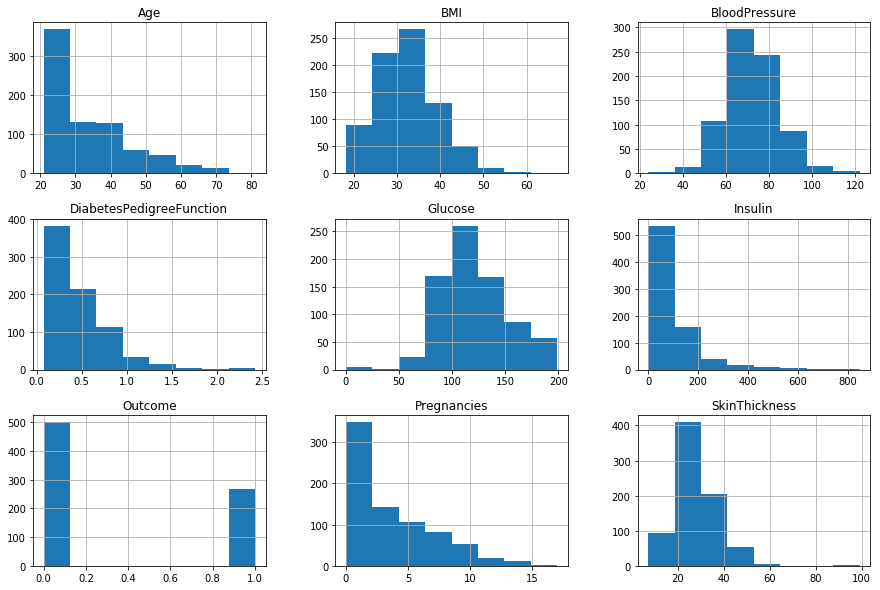

In [112]:
pima_data.hist(figsize=(15,10),bins=8)

#Insights
#Normally Distributed Attributes-Glucose, BloodPressure
#Exponential Distributed Attributes-Age, DiabetesPedigreeFunction,Insulin,SkinThickness
#SkinThickness,DiabetesPedigreeFunction has Outlier

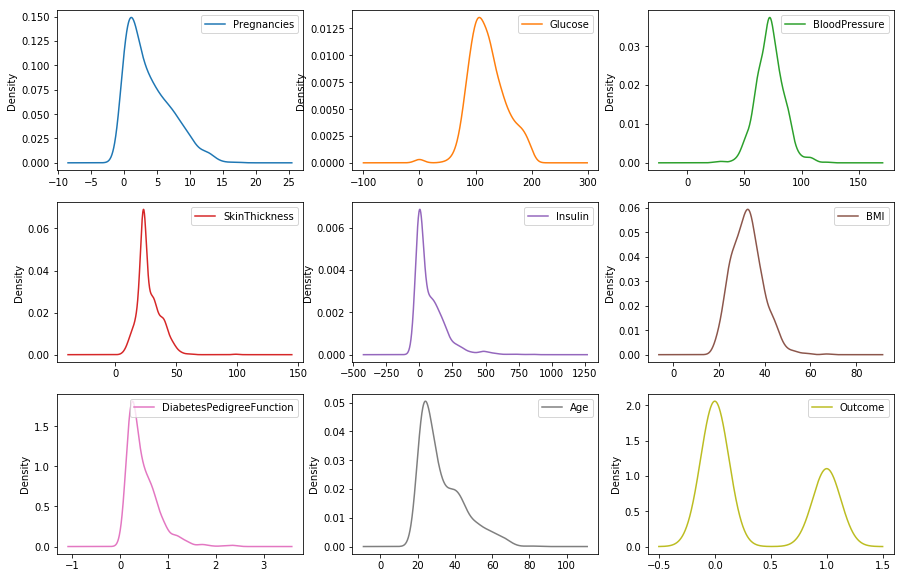

In [113]:
pima_data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,10))
pyplot.show()

#Insights

#Density plot clearly shows an impact of missing values to zero (like Skin thickness)

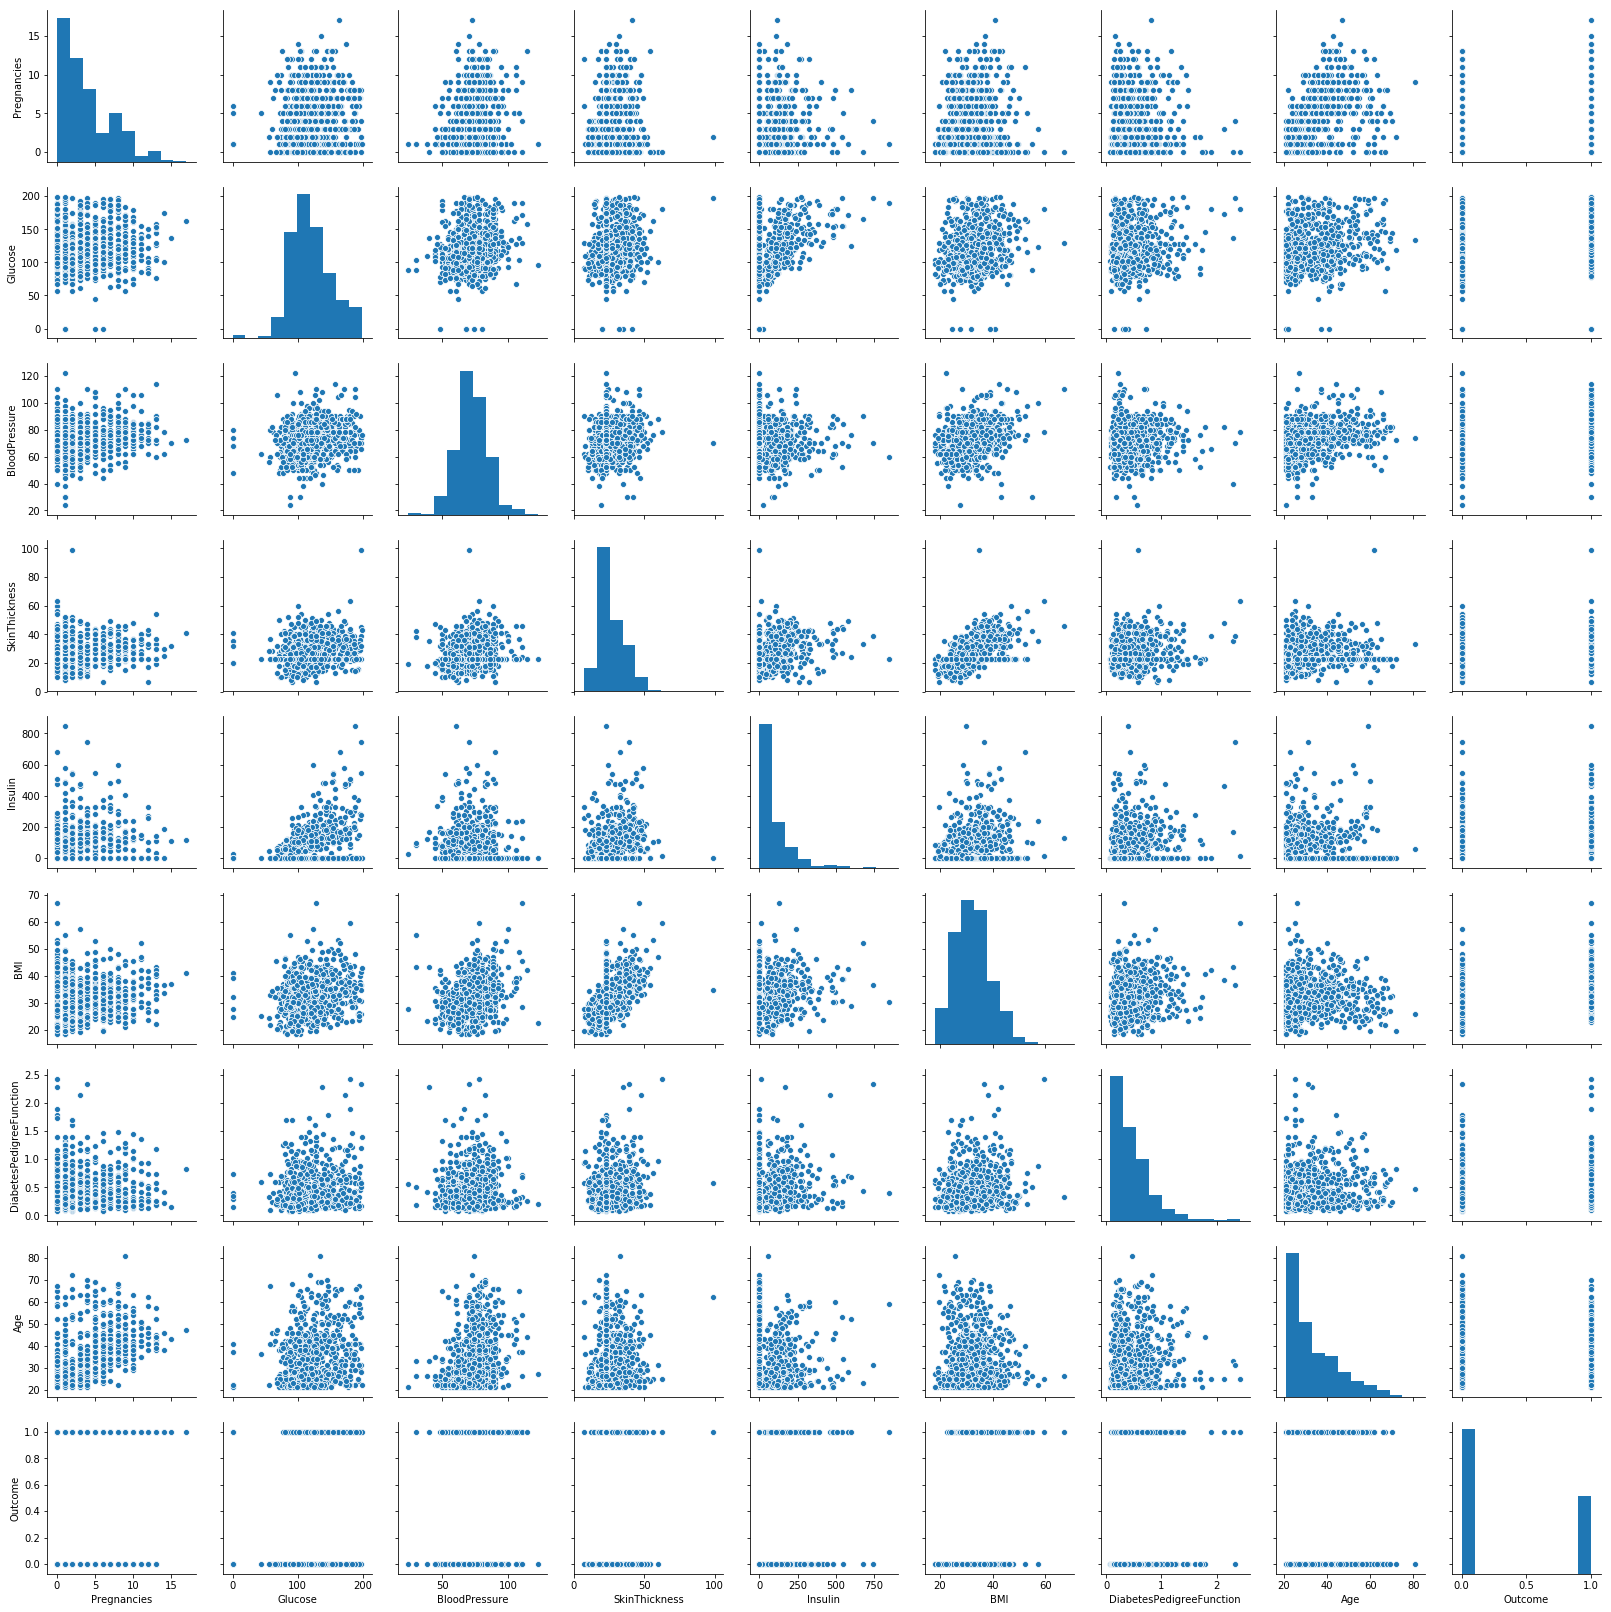

In [114]:
sns.pairplot(pima_data,kind="scatter")

#Insights
#This clearly shows that column#9(Outcome) is a categorical variable with values 0,1
#


In [115]:
corr=pima_data.corr()
corr
#Correlation between various variables
#Better correlation between Pregnancies & Age

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.208615,0.032568,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.217870,0.158027,0.331357,0.218806,0.137337,0.263514,0.466581
BloodPressure,0.208615,0.217870,1.000000,0.147809,-0.045769,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.158027,0.147809,1.000000,0.244250,0.546951,0.142977,0.054514,0.189065
Insulin,-0.073535,0.331357,-0.045769,0.244250,1.000000,0.185356,0.185071,-0.042163,0.130548
BMI,0.021546,0.218806,0.281132,0.546951,0.185356,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137337,-0.002378,0.142977,0.185071,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.324915,0.054514,-0.042163,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.165723,0.189065,0.130548,0.312249,0.173844,0.238356,1.000000


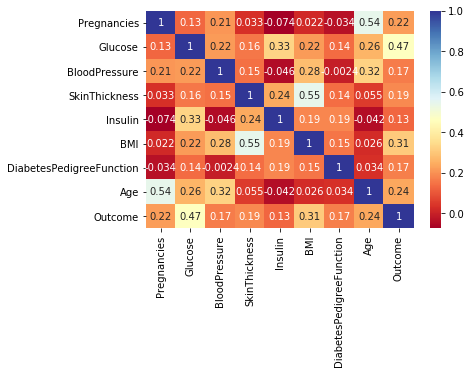

In [ ]:
#Heatmap with different color
sns.heatmap(corr,annot=True,cmap='RdYlBu')
#Insights
#Large Correlation exists between the age and # of pregrnancies, BMI & Insulin



In [ ]:
pima_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,23,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,23,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,72,23,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,23,0,32.0,0.232,54,1


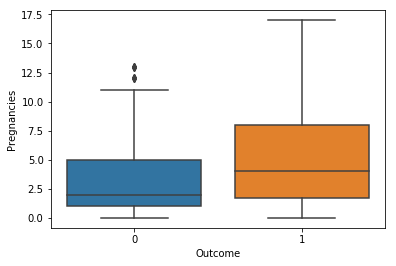

In [ ]:
sns.boxplot(pima_data['Outcome'],pima_data['Pregnancies'])
#The patients who are pregnant often suffers by Diabetics


In [ ]:
#Normalization 
pima_normalization = (pima_data - pima_data.mean()) / (pima_data.max() - pima_data.min())
pima_normalization.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.180326e-18,-9.757820e-19,2.728575e-18,-1.918134e-17,-6.866614e-19,4.975313e-16,2.690990e-16,4.007934e-17,-1.089985e-16
std,1.982105e-01,1.606664e-01,1.234351e-01,1.003154e-01,1.362222e-01,1.406005e-01,1.414725e-01,1.960039e-01,4.769514e-01
min,-2.261795e-01,-6.075102e-01,-4.937420e-01,-2.210286e-01,-9.432563e-02,-2.914297e-01,-1.681795e-01,-2.040148e-01,-3.489583e-01
25%,-1.673560e-01,-1.100228e-01,-8.557876e-02,-4.711560e-02,-9.432563e-02,-1.012456e-01,-9.740662e-02,-1.540148e-01,-3.489583e-01
50%,-4.970895e-02,-1.957051e-02,-3.946110e-03,-4.711560e-02,-5.827362e-02,-9.221093e-03,-4.243224e-02,-7.068142e-02,-3.489583e-01
75%,1.267616e-01,9.726366e-02,7.768654e-02,5.071048e-02,5.608809e-02,8.484844e-02,6.591533e-02,1.293186e-01,6.510417e-01
max,7.738205e-01,3.924898e-01,5.062580e-01,7.789714e-01,9.056744e-01,7.085703e-01,8.318205e-01,7.959852e-01,6.510417e-01


C:\Users\x226683\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


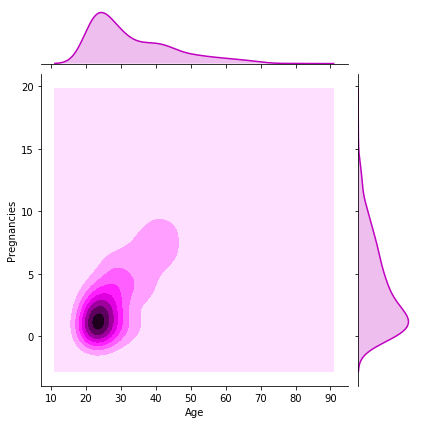

In [ ]:
sns.jointplot(pima_data['Age'], pima_data['Pregnancies'], kind="kde",color="m")

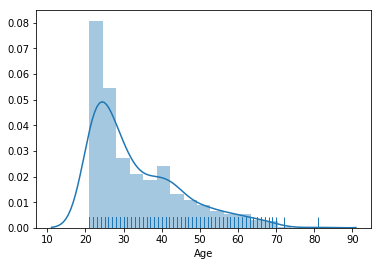

In [ ]:
#Univariant Distribution,
#Rug Parameter draws a small vertical line at the x axis
#Kde--> True value will have a density graph and False will remove the density graph
sns.distplot(pima_data['Age'], kde=True, rug=True);

#Right Skewed

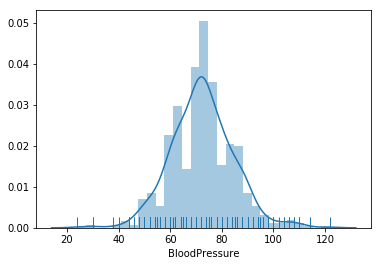

In [ ]:
sns.distplot(pima_data['BloodPressure'], kde=True, rug=True);

#Its neither right nor left skewed. 

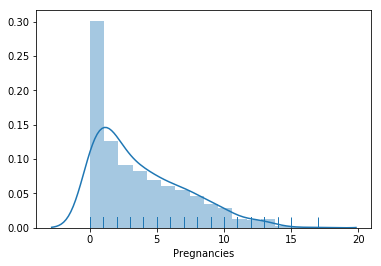

In [ ]:
sns.distplot(pima_data['Pregnancies'], kde=True, rug=True);
#Right Skewed

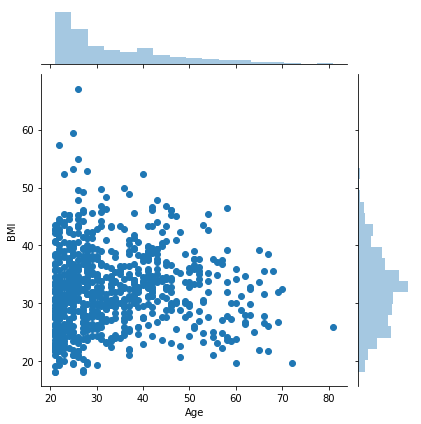

In [ ]:
#Bi-Variant Distributions
sns.jointplot(pima_data['Age'],pima_data['BMI'])
#Insight
#BMI shows patients between age 20 & 30 are obese (dense)

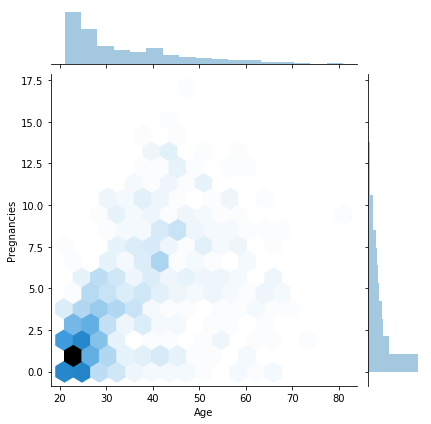

In [ ]:
sns.jointplot(pima_data['Age'],pima_data['Pregnancies'],kind="hex")

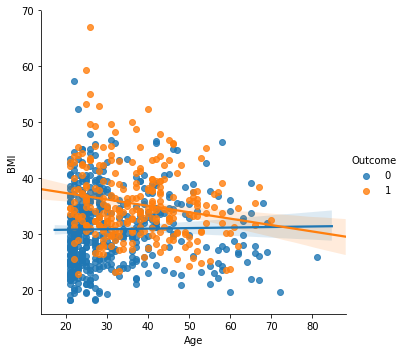

In [ ]:
#Linear Regression Model
sns.lmplot(x="Age", y="BMI", hue='Outcome' ,  data=pima_data)

In [ ]:
sns.catplot(x="Age", 
               y="Pregnancies", 
               hue="Outcome", 
               col="BloodPressure", 
               data=pima_data, 
               kind="swarm")